In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import io
from google.colab import files

In [6]:
uploaded = files.upload()

df = pd.read_csv(io.BytesIO(uploaded['spam_text_message_data.csv']))

Saving spam_text_message_data.csv to spam_text_message_data.csv


In [7]:
df["Category"].replace({'ham': 0 ,'spam': 1}, inplace=True)
print(df.head(10))

   Category                                            Message
0         0  Go until jurong point, crazy.. Available only ...
1         0                      Ok lar... Joking wif u oni...
2         1  Free entry in 2 a wkly comp to win FA Cup fina...
3         0  U dun say so early hor... U c already then say...
4         0  Nah I don't think he goes to usf, he lives aro...
5         1  FreeMsg Hey there darling it's been 3 week's n...
6         0  Even my brother is not like to speak with me. ...
7         0  As per your request 'Melle Melle (Oru Minnamin...
8         1  WINNER!! As a valued network customer you have...
9         1  Had your mobile 11 months or more? U R entitle...


<ipython-input-7-9732efe7c224>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Category"].replace({'ham': 0 ,'spam': 1}, inplace=True)
<ipython-input-7-9732efe7c224>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Category"].replace({'ham': 0 ,'spam': 1}, inplace=True)


  category  number
0     spam     747
1      ham    4825


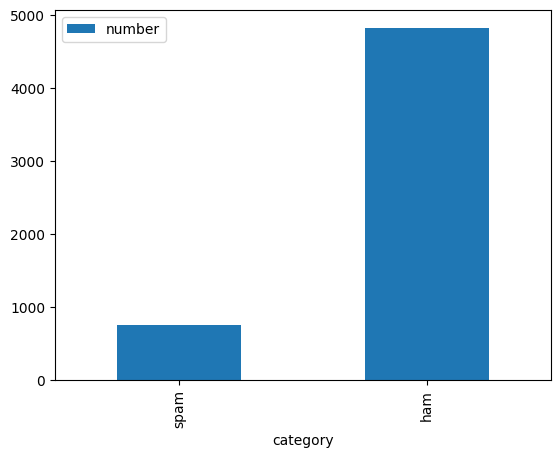

In [8]:
# gain insight from data
data = {'category': ['spam', 'ham'],
        'number': [len(df.loc[df.Category==1]), len(df.loc[df.Category==0])]
        }
df_count = pd.DataFrame(data,columns=['category', 'number'])
print (df_count)

df_count.plot(x ='category', y='number', kind = 'bar')
plt.show()

In [10]:
# cleaning dataset
stemmer = PorterStemmer()
corpus = []

for w in range(len(df['Message'])):
    msg = df['Message'][w]
    msg = re.sub("[^a-zA-Z]", " ", msg)
    msg = msg.lower()
    msg = msg.split()
    msg = " ".join(msg)
    corpus.append(msg)

In [11]:
# create word vector
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
tf.fit(corpus)

X = tf.transform(corpus).toarray()

Y = df['Category']

Train/Test

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [13]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(X_train, y_train)

y_pred = model.predict(X_test)

In [14]:
# compute metrics
from sklearn.metrics import confusion_matrix
confusion_m = confusion_matrix(y_test, y_pred)
print(confusion_m)

[[955   0]
 [ 45 115]]


In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)

In [19]:
print("accurracy = ", acc, "\n")
print("precision = ", prec, "\n")
print("recall = ", rec, "\n")

accurracy =  0.9596412556053812 

precision =  1.0 

recall =  0.71875 

